INFO 6105

Piyush Prashant

NUID: 001444377



  # Twitter Sentiment Analysis and Text Generation Using LSTM


### What are we trying to do?
In this blog, I am trying to analyze social media  contents related to Artificial Intelligence and the Data sciences and do a sentimental analysis and do generaative language Modeling Based on the sentiment classification I am selecting the dataset and using it to train are generative model. I am using Twitter tweets to do the analysis. Later on in the future  I would like to generate my  content based on the analysis as well as some performance metric to choose the tweets and post them for the AI skunkworks community LinkedIn Page.

### Natural Language Processing(NLP)
Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

### Natural Language Generation(NLG)
Natural-language generation (NLG) is one of the tasks of natural language processing that focuses on generating natural language from structured data such as a knowledge base or a logical form (linguistics). 


### Recurrent Neural Networks (RNN)
Recurrent Neural Networks (RNNs) are popular models that are greatly used in many Natural Language Processing (NLP) tasks. A recurrent neural network (RNN) is a part of artificial neural network (ANN) where connections between units form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence. RNNs use their internal state to process the sequence of inputs. This is not possible in feedforward neural networks. They are neural networks which repeatedly make use of sequential information.The main assumption in a traditional artificial neural network is that all inputs and outputs are independent of each other and are not in sequence. But if we look at it, it is not such a great way to approach ANNs. Imagine a scenario where you have to predict the next song a user might want to listen. This will be impossible if the model won't know what songs have already been played. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being dependent on the previous computations.

![alt text](https://i.stack.imgur.com/afqRj.png)

### LSTM
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.They  are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn. All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer. LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

In this project, we are trying to generate the next text that the machine will predict according to the inputs we provide. We are using Artificial neural networks instead of staistical models as we try to guess a human's behavior. The complexity of training an ANN is higher as compared to statistical models.

#### Importing necessary dependencies like textblob, tensorflow and keras

In [0]:
#import pickle as pkl
import pandas as pd
from collections import OrderedDict
from nltk.corpus import stopwords
from textblob import  TextBlob
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import keras.utils as ku 
import glob
import os
import re
import string
from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(2)
seed(1)
import numpy as np
import string, os 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


In [34]:
from google.colab import files
uploaded = files.upload()

Saving AIDatascienceTwitter.csv to AIDatascienceTwitter (4).csv


We preprocess the data and standardize the data by converting the text into lower caase as our model might treat a word which is in the beginning of a sentence with a capital letter different from the same word which appears later in the sentence but without any capital latter. This might lead to decline in the accuracy. 

In [0]:
# Cleaning the tweets
def clean_tweet(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    tweet = "".join(v for v in tweet if v not in string.punctuation).lower()
    tweet = tweet.encode("utf8").decode("ascii",'ignore')
    return tweet

Here we create a DataFrame and drop the records with empty tweets

The data here is scrapped from twitter using Octoparse tool. I have scrapped around 1000 tweets related to Artificial Intelligence and Datascience

In [36]:
#DataProcessing
Data = pd.read_csv('AIDatascienceTwitter.csv', usecols =['Tweet'])
Data = Data.dropna()
modData =  pd.DataFrame(Data['Tweet'].apply(clean_tweet))
modData.head()

,Tweet
0,big data can help us see through government re...
1,blending artificial intelligence and human cre...
2,data science is constantly evolving as technol...
3,data science is constantly evolving as technol...
4,ai languagelearning datascience artificialinte...


We create function that uses the textblob library and classify the sentiments of the tweets by checking its polarity. Negative polarity corresponds to negative sentiments and vice versa for positive sentiments. 

In [0]:
#Getting tweet Sentiment
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [0]:
# Empty list to store tweets
tweets = [] 


A function is created to store the tweets and their respective sentiments in dictionary and the dictionary object is stored in a list.

In [0]:
for tweet in modData['Tweet']:
#         print(tweet)
         # empty dictionary to store required params of a tweet 
         parsed_tweet = {} 
         parsed_tweet['text'] = tweet
         parsed_tweet['sentiment'] = get_tweet_sentiment(tweet) 
         tweets.append(parsed_tweet) 

The analysed tweets are calculated for their share in the sentiment spectrum

In [40]:
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

Positive tweets percentage: 45.19131334022751 %
Negative tweets percentage: 15.201654601861428 %
Neutral tweets percentage: 39.60703205791106 %


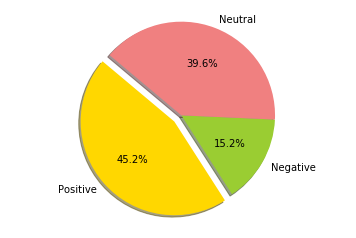

In [41]:
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [len(ptweets), len(ntweets), (len(tweets) - len(ntweets) - len(ptweets))]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


Here we want to to use only those tweets which have positive or neutral  sentiments and use them to train and generate new tweets for our purpose)

In [0]:
# Positvie and neutral tweets are stored in a list 
corpus = [tweet['text'] for tweet in tweets if tweet['sentiment'] == 'positive' or tweet['sentiment'] == 'neutral']


#### Generating Sequence of N-gram Tokens
Language modelling requires a sequence input data, as given a sequence (of words/tokens) the aim is the predict next word/token.


The next step is Tokenization. It is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded. The tokens become the input for another process like parsing and text mining.



Python’s library Keras has inbuilt model for tokenization which can be used to obtain the tokens and their index in the corpus. After this step, every text document in the dataset is converted into sequence of tokens.

In [0]:
tokenizer = Tokenizer()


In [0]:
def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [45]:
inp_sequences, total_words = get_sequence_of_tokens(corpus)
print('Total words:' , total_words)
inp_sequences[:10]

Total words: 3640


[[53, 12],
 [53, 12, 91],
 [53, 12, 91, 139],
 [53, 12, 91, 139, 239],
 [53, 12, 91, 139, 239, 130],
 [53, 12, 91, 139, 239, 130, 240],
 [53, 12, 91, 139, 239, 130, 240, 542],
 [53, 12, 91, 139, 239, 130, 240, 542, 943],
 [53, 12, 91, 139, 239, 130, 240, 542, 943, 543],
 [53, 12, 91, 139, 239, 130, 240, 542, 943, 543, 22]]

In the above output [53, 12], [53, 12, 91],  [53, 12, 91, 139] and so on represents the ngram phrases generated from the input data. where every integer corresponds to the index of a particular word in the complete vocabulary of words present in the text. For example

#### Headline: i stand with the shedevils
#### Ngrams: | Sequence of Tokens


|Ngram  |Sequence of Tokens   |
|------|------|
|   i stand  |  [53, 12]|
|i stand with| [53, 12, 91] |
|i stand with th|[53, 12, 91, 139]|
|i stand with the shedevils|[53, 12, 91, 139, 239]|

#### Padding the Sequences and obtain Variables : Predictors and Target
Now that we have generated a data-set which contains sequence of tokens, it is possible that different sequences have different lengths. Before starting training the model, we need to pad the sequences and make their lengths equal. We can use pad_sequence function of Kears for this purpose. To input this data into a learning model, we need to create predictors and label. We will create N-grams sequence as predictors and the next word of the N-gram as label. For example:

**Headline**: they are learning data science

|PREDICTORS|LABEL|
|----|----|
|they|are|
|they are|learning|
|they are learning|they are learning|
|they are learning data|science|


In [0]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

In [0]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)


Now we can obtain the input vector X and the label vector Y which can be used for the training purposes. Recent experiments have shown that recurrent neural networks have shown a good performance in sequence to sequence learning and text data applications. Lets look at them in brief.

![alt text](http://www.shivambansal.com/blog/text-lstm/2.png)


Unlike Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent Neural Networks. This creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state allows the neurons an ability to remember what have been learned so far.

The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for the network to learn and tune the parameters of the earlier layers. To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.

LSTMs have an additional state called ‘cell state’ through which the network makes adjustments in the information flow. The advantage of this state is that the model can remember or forget the leanings more selectively.  Lets architecture a LSTM model in our code. I have added total three layers in the model.




1.   Input Layer : Takes the sequence of words as input
2.   LSTM Layer : Computes the output using LSTM units. I have added 100 units in the layer, but this number can be fine tuned later.
3. Dropout Layer : A regularisation layer which randomly turns-off the activations of some neurons in the LSTM layer. It helps in preventing over fitting. (Optional Layer)
4. Output Layer : Computes the probability of the best possible next word as output



We will run this model for total 100 epoochs but it can be experimented further.

In [0]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

In [50]:
model = create_model(max_sequence_len, total_words)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 45, 10)            36400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3640)              367640    
Total params: 448,440
Trainable params: 448,440
Non-trainable params: 0
_________________________________________________________________


In [0]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [53]:
model.fit(predictors, label, epochs=100, verbose=5, callbacks=callbacks_list)


Epoch 1/100

Epoch 00001: loss improved from inf to 6.21582, saving model to weights-improvement-01-6.2158.hdf5
Epoch 2/100

Epoch 00002: loss improved from 6.21582 to 5.78879, saving model to weights-improvement-02-5.7888.hdf5
Epoch 3/100

Epoch 00003: loss improved from 5.78879 to 5.50650, saving model to weights-improvement-03-5.5065.hdf5
Epoch 4/100

Epoch 00004: loss improved from 5.50650 to 5.23717, saving model to weights-improvement-04-5.2372.hdf5
Epoch 5/100

Epoch 00005: loss improved from 5.23717 to 4.97961, saving model to weights-improvement-05-4.9796.hdf5
Epoch 6/100

Epoch 00006: loss improved from 4.97961 to 4.74217, saving model to weights-improvement-06-4.7422.hdf5
Epoch 7/100

Epoch 00007: loss improved from 4.74217 to 4.52269, saving model to weights-improvement-07-4.5227.hdf5
Epoch 8/100

Epoch 00008: loss improved from 4.52269 to 4.32444, saving model to weights-improvement-08-4.3244.hdf5
Epoch 9/100

Epoch 00009: loss improved from 4.32444 to 4.13058, saving mode

### Generating the text
Our model architecture is now ready and we can train it using our data. Next lets write the function to predict the next word based on the input words (or seed text). We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word. The multiple predicted words can be appended together to get predicted sequence.

In [0]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [57]:
print (generate_text("big data", 10, model, max_sequence_len))
print (generate_text("Neural Nets", 10, model, max_sequence_len))
print (generate_text("AI", 10, model, max_sequence_len))
print (generate_text("World", 10, model, max_sequence_len))
print (generate_text("Machine Learning", 10, model, max_sequence_len))


Big Data Analytics In Healthcare Market To Reach 34 16 Bn In
Neural Nets Learning To Service April 22 In Seattle New Medium Ai
Ai Tool Could Help Diagnose Alzheimer S Ai Ml Dl Machinelearning
World To Use Model What S Not Big Data And The
Machine Learning Algorithms In One Chart Via Ai Deeplearning Machinelearning Datascience Bigdatapic


# Conclusion 
As we can see, the model has produced the output which looks fairly fine. The results can be improved further with following points:

### Future Improvements
   1. The selection data can be based on their performance in social media ,i.e. that is cllecting tweets  and posts which have high user acceptance. 
   2. We could increase the size of the dataset and scrap data across various social media platforms .
   3. Fine Tuning the network architecture
   4. Fine Tuning the network parameters
   5. We could compare the LSTM against diffrent RNNs

## Contribution Stataement

40% work carried out and contributed by Piyush Prashant

60% - External resources

## Licenses


MIT License

Copyright (c) 2019 Piyush Prashant

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## References
http://colah.github.io/posts/2015-08-Understanding-LSTMs/<br>
https://www.datacamp.com/community/tutorials/deep-learning-python<br>
https://github.com/tensorflow/models<br>
https://chunml.github.io/ChunML.github.io/project/Creating-Text-Generator-Using-Recurrent-Neural-Network/<br>
https://en.wikipedia.org/wiki/Long_short-term_memory<br>
https://deeplearning4j.org/lstm.html<br>
https://keras.io/layers/core/